In [51]:
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Function to load and preprocess images
def load_and_preprocess_images(folder, size=(28,28)):
    images = []
    labels = []

    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        image_count = 0
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)
            img = tf.io.read_file(img_path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, size)
            img = tf.keras.applications.resnet.preprocess_input(img)
            images.append(img)
            labels.append(label)
            image_count += 1

    return tf.convert_to_tensor(images), tf.convert_to_tensor(labels)

# Load training and testing data
train_images, train_labels = load_and_preprocess_images("A,B,CNNS_with_Tim/veggie_heap_training")
test_images, test_labels = load_and_preprocess_images("A,B,CNNS_with_Tim/veggie_heap_testing")

In [53]:
# Encode labels
le = LabelEncoder()
train_labels_encoded = le.fit_transform(train_labels)
test_labels_encoded = le.transform(test_labels)

# Normalize the pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0


In [54]:
import tensorflow as tf

# Define CNN model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    #tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [55]:
# Train the model
cnn = model.fit(train_images, train_labels_encoded, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
154/154 [==============================] - 2s 8ms/step - loss: 1.2179 - accuracy: 0.6056
Epoch 2/10
154/154 [==============================] - 1s 7ms/step - loss: 0.5434 - accuracy: 0.8179
Epoch 3/10
154/154 [==============================] - 1s 7ms/step - loss: 0.3887 - accuracy: 0.8694
Epoch 4/10
154/154 [==============================] - 1s 7ms/step - loss: 0.2910 - accuracy: 0.9029
Epoch 5/10
154/154 [==============================] - 1s 7ms/step - loss: 0.2433 - accuracy: 0.9178
Epoch 6/10
154/154 [==============================] - 1s 8ms/step - loss: 0.2039 - accuracy: 0.9338
Epoch 7/10
154/154 [==============================] - 1s 7ms/step - loss: 0.1749 - accuracy: 0.9414
Epoch 8/10
154/154 [==============================] - 1s 7ms/step - loss: 0.1449 - accuracy: 0.9511
Epoch 9/10
154/154 [==============================] - 1s 7ms/step - loss: 0.1241 - accuracy: 0.9603
Epoch 10/10
154/154 [==============================] - 1s 7ms/step - loss: 0.1065 - accuracy: 0.9644

In [56]:
# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(test_images, test_labels_encoded)

train_loss, train_accuracy = model.evaluate(train_images, train_labels_encoded)

# Predict classes for testing data
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate metrics
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy*100)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy*100)

76/76 [==============================] - 0s 3ms/step
Train Loss: 0.08143538236618042
Train Accuracy: 97.11235165596008
Test Loss: 2.101362705230713
Test Accuracy: 66.79043173789978


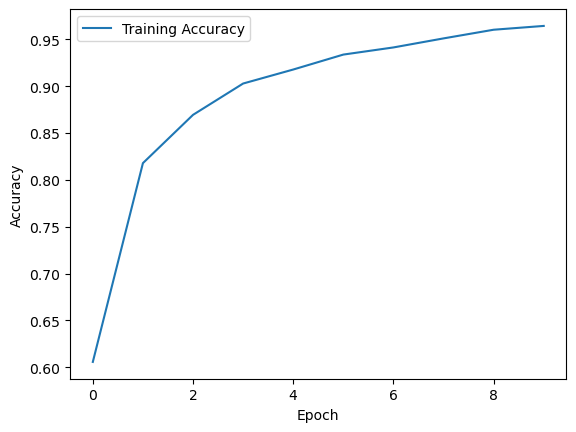

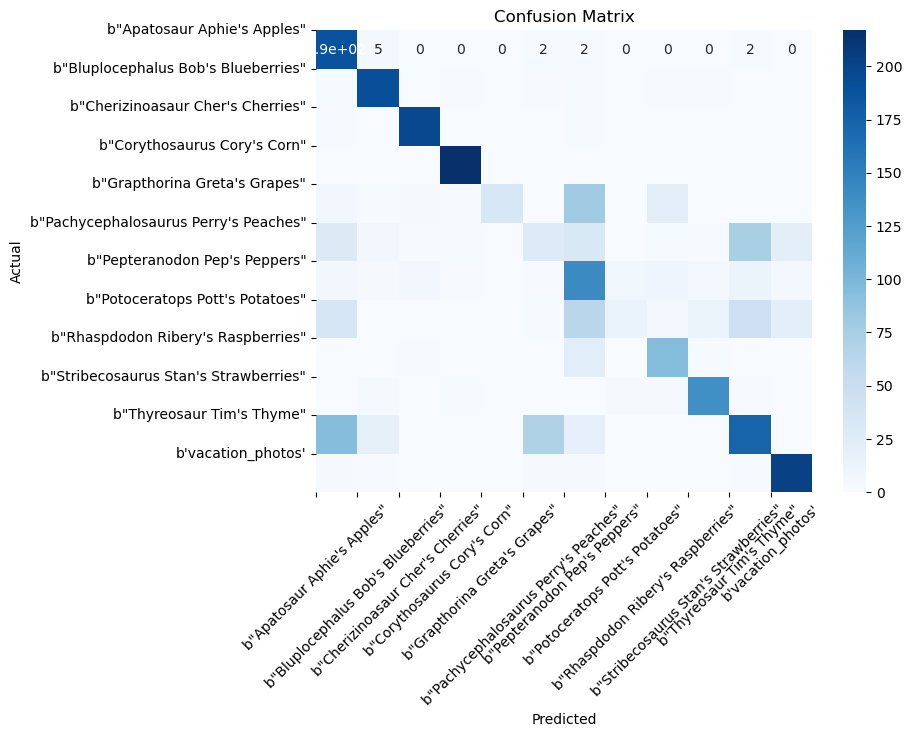

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.94      0.67       200
           1       0.83      0.96      0.89       200
           2       0.94      0.98      0.96       200
           3       0.97      1.00      0.98       217
           4       1.00      0.23      0.37       150
           5       0.26      0.14      0.18       199
           6       0.38      0.70      0.50       200
           7       0.54      0.07      0.12       200
           8       0.68      0.78      0.73       122
           9       0.87      0.91      0.89       150
          10       0.56      0.46      0.51       373
          11       0.80      0.95      0.87       213

    accuracy                           0.67      2424
   macro avg       0.70      0.68      0.64      2424
weighted avg       0.68      0.67      0.63      2424



In [58]:

# Plot training/validation accuracy over epochs
plt.plot(cnn.history['accuracy'], label='Training Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot confusion matrix
classes = np.unique(train_labels)
conf_mat = confusion_matrix(test_labels_encoded, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues')

# Set x and y axis labels
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes,rotation=0)


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(test_labels_encoded, predicted_labels))

